# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [2]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [3]:
df = pd.DataFrame(X, columns = columns)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [5]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=columns)  # тут обязатель но transform, чтобы совпадать с train skaler

# Делаем новый DataFrame, чтобы сохранялись нормальные названия колонок

In [6]:
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
# linear regression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

model = sm.OLS(y_train, X_train_scaled)
resultsLinear = model.fit()
X_test_scaled = sm.add_constant(X_test_scaled)
y_pred = resultsLinear.predict(X_test_scaled)
print("linear regression test RMSE = %.4f" % sqrt(mean_squared_error(y_test, y_pred)))
print("linear regression test R^2 = %.4f" % r2_score(y_test, y_pred))

linear regression test RMSE = 5.7835
linear regression test R^2 = 0.5892


In [8]:
# Ridge
from sklearn.linear_model import Ridge

# используем Ridge так, чтобы можно было взять summary2. 
resultsRidge = model.fit_regularized(L1_wt=0, alpha=0.01) # L1_wt = 0 означает, что импользуем Ridge

resultsRidge = sm.regression.linear_model.OLSResults(model, resultsRidge.params, model.normalized_cov_params)

y_pred = resultsRidge.predict(X_test_scaled)
print("Ridge test RMSE = %.4f" % sqrt(mean_squared_error(y_test, y_pred)))
print("Ridge test R^2 = %.4f" % r2_score(y_test, y_pred))

Ridge test RMSE = 5.8270
Ridge test R^2 = 0.5830


In [9]:
# Lasso
from sklearn.linear_model import Lasso

# используем Lasso так, чтобы можно было взять summary2. 
resultsLasso = model.fit_regularized(L1_wt=1, alpha=0.01) # L1_wt = 1 означает, что импользуем Lasso
resultsLasso = sm.regression.linear_model.OLSResults(model, resultsLasso.params, model.normalized_cov_params)
#model.normalized_cov_params нужно тоже для функции summary2

y_pred = resultsLasso.predict(X_test_scaled)
print("Lasso test RMSE = %.4f" % sqrt(mean_squared_error(y_test, y_pred)))
print("Lasso test R^2 = %.4f" % r2_score(y_test, y_pred))

Lasso test RMSE = 5.7962
Lasso test R^2 = 0.5874


Ссылка на документацию, где я прочитала про то, как использовать Ridge и Lasso с помощью fit_regularized. 
Этот способ позволяет взять summary2.

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html 

---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [10]:
resultsLinear.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2370.9385
Date:               2021-10-11 21:53 BIC:                2426.9583
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.2    
Df Residuals:       390              Prob (F-statistic): 9.64e-117
R-squared:          0.773            Scale:              20.020   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2226   101.5764   0.0000   22.1742   23.0495
CRIM      -0.9708     0.2980    -3.2575   0.0012   -1.5568   -0.3849
ZN         1.0571     0.3408     3.1022   0.0021    0.3872    1.7271
INDUS      0.0383     0.4428     0.0865   0.9311   -0.8324    0.9090
CHAS       0.5945     0.2291     2.5946   0.0098    0.1440    1.0450
NOX       -1.8551     0.4846    -3.8282   0.0002   -2.8079   -0.9024
RM         2.5732     0.3175     8.1058   0.0000    1.9491    3.1974
AGE       -0.0876     0.4022    -0.2178   0.8277   -0.8784    0.7032
DIS       -2.8809     0.4446    -6.4800   0.0000   -3.7550   -2.0068
RAD        2.1122     0.6069     3.4805   0.0006    0.9191    3.3054
TAX       -1.8753     0.6652    -2.8191   0.0051   -3.1832   -0.5675
PTRATIO   -2.2928     0.3003    -7.6359   0.0000   -2.8831   -1.7024
B          0.7182     0.2613     2.7486   0.0063    0.2045    1.2319
LSTAT     -3.5925     0.3954    -9.0855   0.0000   -4.3698   -2.8151
------------------------------------------------------------------
Omnibus:             141.494       Durbin-Watson:          1.996  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       629.882
Skew:                1.470         Prob(JB):               0.000  
Kurtosis:            8.365         Condition No.:          10     
==================================================================

"""

In [11]:
resultsRidge.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2372.3540
Date:               2021-10-11 21:53 BIC:                2428.3738
No. Observations:   404              Log-Likelihood:     -1172.2  
Df Model:           13               F-statistic:        101.7    
Df Residuals:       390              Prob (F-statistic): 1.90e-116
R-squared:          0.772            Scale:              20.091   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.3880     0.2230   100.3946   0.0000   21.9496   22.8264
CRIM      -0.9389     0.2986    -3.1449   0.0018   -1.5259   -0.3519
ZN         0.9965     0.3414     2.9190   0.0037    0.3253    1.6676
INDUS     -0.0576     0.4436    -0.1298   0.8968   -0.9298    0.8146
CHAS       0.6098     0.2295     2.6566   0.0082    0.1585    1.0611
NOX       -1.7222     0.4854    -3.5477   0.0004   -2.6766   -0.7678
RM         2.6120     0.3180     8.2135   0.0000    1.9868    3.2372
AGE       -0.1155     0.4029    -0.2867   0.7745   -0.9078    0.6767
DIS       -2.7539     0.4454    -6.1834   0.0000   -3.6295   -1.8783
RAD        1.8348     0.6079     3.0181   0.0027    0.6396    3.0301
TAX       -1.6265     0.6664    -2.4407   0.0151   -2.9366   -0.3163
PTRATIO   -2.2561     0.3008    -7.5007   0.0000   -2.8475   -1.6648
B          0.7188     0.2617     2.7463   0.0063    0.2042    1.2334
LSTAT     -3.5287     0.3961    -8.9086   0.0000   -4.3074   -2.7499
------------------------------------------------------------------
Omnibus:             147.660       Durbin-Watson:          1.990  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       694.793
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.659         Condition No.:          10     
==================================================================

"""

In [12]:
resultsLasso.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2371.0439
Date:               2021-10-11 21:53 BIC:                2427.0637
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.1    
Df Residuals:       390              Prob (F-statistic): 1.01e-116
R-squared:          0.773            Scale:              20.025   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6019     0.2226   101.5182   0.0000   22.1642   23.0396
CRIM      -0.9403     0.2981    -3.1547   0.0017   -1.5263   -0.3543
ZN         1.0215     0.3408     2.9972   0.0029    0.3514    1.6916
INDUS      0.0000     0.4429     0.0000   1.0000   -0.8708    0.8708
CHAS       0.5948     0.2292     2.5955   0.0098    0.1442    1.0453
NOX       -1.8029     0.4847    -3.7200   0.0002   -2.7558   -0.8500
RM         2.5852     0.3175     8.1423   0.0000    1.9609    3.2094
AGE       -0.0690     0.4023    -0.1715   0.8639   -0.8599    0.7220
DIS       -2.8085     0.4446    -6.3162   0.0000   -3.6827   -1.9343
RAD        1.9567     0.6070     3.2238   0.0014    0.7634    3.1501
TAX       -1.7392     0.6653    -2.6141   0.0093   -3.0472   -0.4311
PTRATIO   -2.2788     0.3003    -7.5884   0.0000   -2.8692   -1.6884
B          0.7056     0.2613     2.7000   0.0072    0.1918    1.2193
LSTAT     -3.5969     0.3955    -9.0956   0.0000   -4.3744   -2.8194
------------------------------------------------------------------
Omnibus:             143.585       Durbin-Watson:          1.997  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       649.888
Skew:                1.488         Prob(JB):               0.000  
Kurtosis:            8.455         Condition No.:          10     
==================================================================

"""

```Важный параметр модели - R^2 или adjusted R^2, который показывает на сколько хорошо модель описала данные. Чем он ближе к единице, тем лучше модель, поэтому ~0.77 (мы видим для всех трех случаев) довольно неплохой результат, но и не очень хороший.
Также видно, что INDUS и AGE - незначимые параметы, так как имеют большие значения p-value. 
Граничное значение p-value принято брать 5%, поэтому незначимыми для всех трех моделей оказались только 2 этих параметра.
Отличие можно заметить для Linear regression и Ridge, противопоставляя их Lasso. В последней модели параметр INDUS имеет нулевой коэффициент и p-value 1, для других моделей эти параметры близки к нулю и единице, но не равны им в точности.
В целом, видно, что модели сработали очень близко друг к другу.```

```Также можно сравнить значениям F-статистик. Чем выше значение, тем лучше модель для данных, но в нашем случае три значения очень близки друг к другу.```

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [13]:
# Используем Backward elimination
# Для этого построим модель со всеми параметрами (предикторами), 
# затем будем удалять по одному предиктору (при удалении которого МАКСИМАЛЬНО уменьшается ошибка MSE)
# Удаляем предикторы из модели до тех пор, пока не получим ухудшение модели при каждом удалении предикторов

In [14]:
# напишем функцию тренировки модели (обычная линейная регрессия)
# ее понадобится использовать несколько раз, так как при каждом удалении надо переучивать модель
# возвращает она mse, так как это мера качества модели

def train(df, y):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)  # тут обязатель но transform, чтобы совпадать с train skaler
   
    X_train_scaled = sm.add_constant(X_train_scaled)
    
    model = sm.OLS(y_train, X_train_scaled)
    resultsLinear = model.fit()
    X_test_scaled = sm.add_constant(X_test_scaled)
    y_pred = resultsLinear.predict(X_test_scaled)
    return mean_squared_error(y_test, y_pred)

In [15]:
def find_worse_predictor(df, y):
    mse_list = list()
    for col in df.columns:
        mse_list.append(train(df.drop(col, axis = 1), y))
        #худший предиктор тот, без которого меньше mse
    return df.columns[mse_list.index(min(mse_list))], min(mse_list)

In [16]:
def backward(df, y):
    mse = train(df, y)
    while(len(df.columns) > 0):
        worse_col, new_mse = find_worse_predictor(df, y)
        if new_mse < mse:
            df = df.drop(worse_col, axis = 1)
            print(f"{worse_col} was deleted")
            mse = new_mse
        else:
            return mse

In [17]:
new_mse = backward(df, y)

AGE was deleted


```Делаем вывод, что предиктор AGE действительно был удален (у него было большое p-value)
Переменная INDUS не удалилась, хотя p-value было большое.```

In [18]:
# посмотрим на RMSE новой модели
sqrt(new_mse)

5.78022292182219

In [19]:
# посмотрим на summary2 новой модели
df_new = df.drop('AGE', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df_new.columns)
X_test_scaled = pd.DataFrame(data = scaler.transform(X_test), columns = df_new.columns)  # тут обязатель но transform, чтобы совпадать с train skaler
   
X_train_scaled = sm.add_constant(X_train_scaled)
    
model = sm.OLS(y_train, X_train_scaled)
resultsLinear = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
resultsLinear.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.766    
Dependent Variable: y                AIC:                2368.9876
Date:               2021-10-11 21:53 BIC:                2421.0060
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           12               F-statistic:        110.9    
Df Residuals:       391              Prob (F-statistic): 9.16e-118
R-squared:          0.773            Scale:              19.971   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2223   101.7003   0.0000   22.1748   23.0490
CRIM      -0.9684     0.2975    -3.2556   0.0012   -1.5532   -0.3836
ZN         1.0682     0.3365     3.1742   0.0016    0.4066    1.7299
INDUS      0.0402     0.4422     0.0910   0.9276   -0.8292    0.9096
CHAS       0.5932     0.2288     2.5929   0.0099    0.1434    1.0429
NOX       -1.8863     0.4625    -4.0789   0.0001   -2.7955   -0.9771
RM         2.5599     0.3111     8.2284   0.0000    1.9482    3.1715
DIS       -2.8534     0.4257    -6.7025   0.0000   -3.6904   -2.0164
RAD        2.1213     0.6047     3.5079   0.0005    0.9324    3.3102
TAX       -1.8787     0.6642    -2.8283   0.0049   -3.1846   -0.5727
PTRATIO   -2.2965     0.2994    -7.6703   0.0000   -2.8852   -1.7079
B          0.7123     0.2596     2.7440   0.0063    0.2020    1.2227
LSTAT     -3.6230     0.3692    -9.8142   0.0000   -4.3488   -2.8973
------------------------------------------------------------------
Omnibus:             140.079       Durbin-Watson:          1.999  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       613.975
Skew:                1.459         Prob(JB):               0.000  
Kurtosis:            8.288         Condition No.:          9      
==================================================================

"""

```Совсем немного увеличился R^2 и сильно увеличилась F статистика.
Параметры говорят в целом об улучшении модели, но p-value параметра INDUS осталось большим```

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [21]:
# используем старый df (без удаления предикторов)
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns = columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns = columns)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)


alphas = np.logspace(-4, 3, 500)

searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Best alpha = 5.6952


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


```Лучшее значение параметра альфа получилось 5.7 при 500 шагах```

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [22]:
import random

In [23]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        
        self.loss_history = []
       
        if self.w0 is None:
            self.w0 = np.zeros(X.shape[1])
        
        if self.gd_type == 'GradientDescent':
            self.w = np.array(self.w0)
            prev_w = np.array(self.w)
            for i in range(self.max_iter):
                self.w -= self.eta * self.calc_gradient(X,y)
                
                self.loss_history.append(self.calc_loss(X,y))
                if np.linalg.norm(self.w - prev_w) < self.tolerance:
                    break
                prev_w = np.array(self.w)
                
                
                
        elif self.gd_type == 'StochasticDescent':            
            self.w = np.array(self.w0)
            prev_w = np.array(self.w)
            np.random.seed(0)
            for i in range(self.max_iter):
                sample = np.random.choice(X.shape[0], int(round(X.shape[0]*self.delta)))
                self.w -= self.eta * self.calc_gradient(np.take(X, sample, axis = 0), np.take(y, sample))
                
                self.loss_history.append(self.calc_loss(X,y))
                if np.linalg.norm(self.w - prev_w) < self.tolerance:
                    break
                prev_w = np.array(self.w)
                
                
                
                
        elif self.gd_type == 'Momentum':
            self.w = np.array(self.w0)
            prev_w = np.array(self.w)
            h = np.zeros(X.shape[1])
            np.random.seed(0)
            for i in range(self.max_iter):
                sample = np.random.choice(X.shape[0], int(round(X.shape[0]*self.delta)))
                h = self.alpha * h + self.eta * self.calc_gradient(np.take(X, sample, axis = 0), np.take(y, sample))
                self.w -= h
                self.loss_history.append(self.calc_loss(X,y))
                if np.linalg.norm(self.w - prev_w) < self.tolerance:
                    break
                prev_w = np.array(self.w)
                
                
                
        else:
            raise Exception(f'Unknown method called {self.gd_type}')
        
        return self
        
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * np.dot(X.T, np.dot(X, self.w) - y) / y.shape[0]
        

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return ((self.predict(X) - y)**2).mean()

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [24]:
def hand_written_model(gd_type, delta=1.0,
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
    gd = LinReg(gd_type=gd_type, delta=delta,
                 tolerance=tolerance, max_iter=max_iter, w0=w0, eta=eta, alpha=alpha)
    gd.fit(X_train_scaled,y_train)
    rmse = sqrt(mean_squared_error(y_test, gd.predict(X_test_scaled)))
    r2 = r2_score(y_test, gd.predict(X_test_scaled))
    return rmse, r2

### GradientDescent

In [25]:
# Рассмотрим обычный градиентный спуск
print('max_iter = 1000, eta = 1e-2, tolerance = 1e-4')
rmse, r2 = hand_written_model('GradientDescent')
print(f"GradientDescent RMSE ", rmse)
print(f"GradientDescent R^2 ", r2)
    
print('max_iter = 1000, eta = 0.1, tolerance = 1e-4')
rmse, r2 = hand_written_model('GradientDescent', eta = 0.1)
print("GradientDescent RMSE ", rmse)
print("GradientDescent R^2 ", r2)

max_iter = 1000, eta = 1e-2, tolerance = 1e-4
GradientDescent RMSE  5.821578365471963
GradientDescent R^2  0.5837968275485603
max_iter = 1000, eta = 0.1, tolerance = 1e-4
GradientDescent RMSE  5.783771602264095
GradientDescent R^2  0.5891851258289817


In [26]:
#Получаем, что best eta ~ 0.1 (learning rate)
rmse_list = list()
for etas in np.logspace(-3, -1, 10):
    rmse, r2 = hand_written_model('GradientDescent', eta = etas)
    rmse_list.append(rmse)
print(f'Best eta = {np.logspace(-3, -1, 10)[rmse_list.index(min(rmse_list))]}')

Best eta = 0.1


In [27]:
#Получаем, что сначала чем больше итераций, тем лучше результат,
#но при слишком большом количестве качество ухудшается
rmse_list = list()
for iter in range(100, 3000, 50):
    rmse_list.append(hand_written_model('GradientDescent', max_iter = iter))
print(f'Best max_iter = {range(100, 3000, 50)[rmse_list.index(min(rmse_list))]}')

Best max_iter = 2850


#### Получили, что приблизительно нужно ограничение на приблизительно 2850 итераций и лучший результат достигается при eta = 0.1. Эти параметры приблизительные, позволяют оценить тенденцию в целом. 

### StochasticDescent

In [28]:
# Посмотрим на Stohastic gradient
print('max_iter = 1000, eta = 1e-2, tolerance = 1e-4')
rmse, r2 = hand_written_model('StochasticDescent')
print(f"StochasticDescent RMSE ", rmse)
print(f"StochasticDescent R^2 ", r2)
    
print('max_iter = 1000, eta = 0.1, tolerance = 1e-4')
rmse, r2 = hand_written_model('StochasticDescent', eta = 0.1)
print("StochasticDescent RMSE ", rmse)
print("StochasticDescent R^2 ", r2)

max_iter = 1000, eta = 1e-2, tolerance = 1e-4
StochasticDescent RMSE  5.8428629264745355
StochasticDescent R^2  0.5807478619156733
max_iter = 1000, eta = 0.1, tolerance = 1e-4
StochasticDescent RMSE  5.978542744818886
StochasticDescent R^2  0.5610504909168665


In [29]:
#Получаем, что best eta ~ 0.0215 (learning rate)
rmse_list = list()
for etas in np.logspace(-3, -1, 10):
    rmse, r2 = hand_written_model('StochasticDescent', eta = etas)
    rmse_list.append(rmse)
print(f'Best eta = {np.logspace(-3, -1, 10)[rmse_list.index(min(rmse_list))]}')

Best eta = 0.021544346900318832


In [30]:
rmse_list = list()
for delta in range(1, 100, 10):
    rmse_list.append(hand_written_model('StochasticDescent', delta = delta/100))
print(f'Best delta = {range(1, 100, 10)[rmse_list.index(min(rmse_list))]/100}')
# получаем приблизительную оценку лучшей пропорции разбиения выборки 0.01, то есть 1%

Best delta = 0.01


In [31]:
rmse_list = list()
for delta in range(1, 100, 5):
    rmse_list.append(hand_written_model('StochasticDescent', delta = delta/500))
print(f'Best delta = {range(1, 100, 5)[rmse_list.index(min(rmse_list))]/500}')
# Получим более точную лучшую пропорцию 0.012, то есть около 1%

Best delta = 0.012


In [32]:
#Получаем, что сначала чем больше итераций, тем лучше результат,
#но при слишком большом количестве качество ухудшается
rmse_list = list()
for iter in range(100, 3000, 50):
    rmse_list.append(hand_written_model('StochasticDescent', max_iter = iter, delta = 0.02))
print(f'Best max_iter = {range(100, 3000, 50)[rmse_list.index(min(rmse_list))]}')

Best max_iter = 2700


#### Получили, что лучшее ограничение на кол-во итераций это 2700, а лучшая пропорция для стохастического градиента - около 1%. Параметры опять же приблизительные, но думаю, что в целом отражают ожидания.

### Momentum


In [33]:
#Получаем, что best eta ~ 0.0215 (learning rate)
rmse_list = list()
for etas in np.logspace(-3, -1, 10):
    rmse, r2 = hand_written_model('Momentum', eta = etas)
    rmse_list.append(rmse)
print(f'Best eta = {np.logspace(-3, -1, 10)[rmse_list.index(min(rmse_list))]}')

Best eta = 0.021544346900318832


In [34]:
rmse_list = list()
for delta in range(1, 100, 5):
    rmse_list.append(hand_written_model('Momentum', delta = delta/500))
print(f'Best delta = {range(1, 100, 5)[rmse_list.index(min(rmse_list))]/500}')
# Получим более точную лучшую пропорцию 0.012, то есть около 1%

Best delta = 0.012


In [35]:
#Получаем, что сначала чем больше итераций, тем лучше результат,
#но при слишком большом количестве качество ухудшается
rmse_list = list()
for iter in range(100, 3000, 50):
    rmse_list.append(hand_written_model('Momentum', max_iter = iter, delta = 0.02))
print(f'Best max_iter = {range(100, 3000, 50)[rmse_list.index(min(rmse_list))]}')

Best max_iter = 2700


In [36]:
rmse_list = list()
for alpha in range(1, 100, 5):
    rmse_list.append(hand_written_model('Momentum', alpha = alpha/500))
print(f'Best alpha = {range(1, 100, 5)[rmse_list.index(min(rmse_list))]/500}')
# Получим более точную лучшую пропорцию 0.022, то есть около 2%

Best alpha = 0.192


### Сравнение dg, sgd, momentum

In [37]:
# Возьмем найденные параметры для трех моделей и сравним результат ошибки
rmse, r2 = hand_written_model('GradientDescent', eta = 0.1, max_iter = 2850)
print(f"GradientDescent RMSE ", rmse)
print(f"GradientDescent R^2 ", r2)

rmse, r2 = hand_written_model('StochasticDescent', delta = 0.012, eta = 0.022, max_iter = 2700)
print(f"StochasticDescent RMSE ", rmse)
print(f"StochasticDescent R^2 ", r2)


rmse, r2 = hand_written_model('Momentum', delta = 0.012, eta = 0.022, max_iter = 2700, alpha = 0.192)
print(f"Momentum RMSE ", rmse)
print(f"Momentum R^2 ", r2)

GradientDescent RMSE  5.783771602264095
GradientDescent R^2  0.5891851258289817
StochasticDescent RMSE  6.374213137223867
StochasticDescent R^2  0.5010269926963569
Momentum RMSE  6.523224292524258
Momentum R^2  0.47742513965874256


```Мы выявили приблизительно хорошие параметры для моделей, и в этом случае получилось, что обычный градиентный спуск приводит к меньшей ошибке из всех трех способов. Тем не менее, это не означает, что нельзя подобрать параметры, которые покажут другие результаты.
Что касается готовой реализации, результат получился приблизительно такой же в случае обычного градиентного спуска, разница ошибки уже в 3-ем знаке. Можно считать ручную реализацию удавшейся, хотя я ожидала, что она будет намного хуже в сравнении (сильно хуже оказались stohastic алгоритмы).```

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

In [38]:
def hand_written_model_get_model(gd_type, delta=1.0,
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
    gd = LinReg(gd_type=gd_type, delta=delta,
                 tolerance=tolerance, max_iter=max_iter, w0=w0, eta=eta, alpha=alpha)
    gd.fit(X_train_scaled,y_train)
    return gd

In [39]:
gd = hand_written_model_get_model('GradientDescent', eta = 0.1, max_iter = 2850)
sgd = hand_written_model_get_model('StochasticDescent', delta = 0.01, eta = 0.02, max_iter = 2700)
momentum = hand_written_model_get_model('Momentum', delta = 0.01, eta = 0.02, max_iter = 2700, alpha = 0.192)

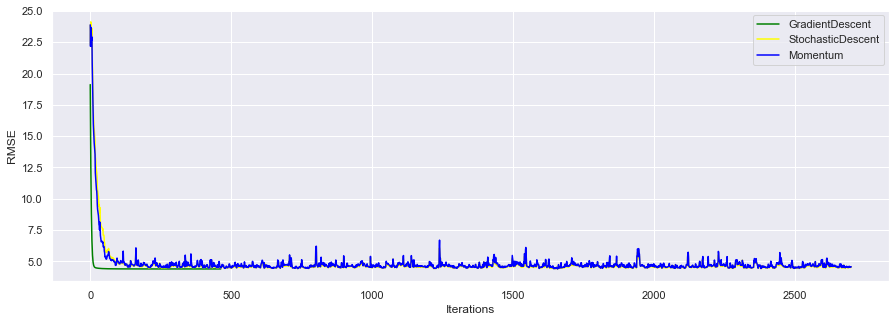

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(gd.loss_history),label='GradientDescent', color = 'green')
plt.plot(np.sqrt(sgd.loss_history),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history),label='Momentum', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()


#### Как мы видим, momentum и sgd почти сливаются и неразличимы на большом масштабе, но gd сходится к лучшей ошибке быстрее остальных. Так же видно, что sgd и momentum нестабильны при большом количестве итераций.

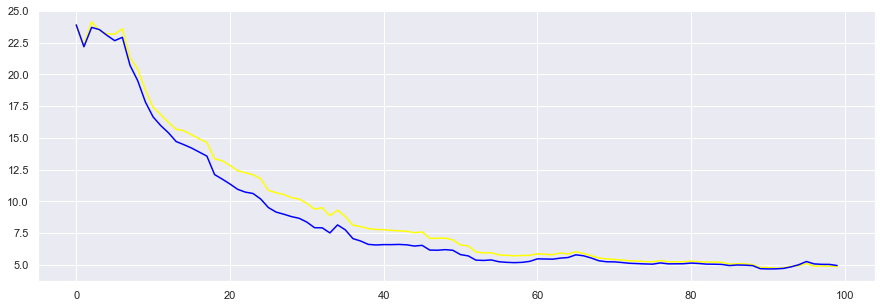

In [41]:
# Попробуем рассмотреть отдельно momentum и stochastic
plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(sgd.loss_history[:100]),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history[:100]),label='Momentum', color = 'blue')

#### Видно, что эти два методы при одинковых параметрах сходятся к лучшей ошибке приблизительно одинаково. Посмотрим, что происходит на больших значениях номера итерации. Предположительно, momentum должен быть более стабилен.

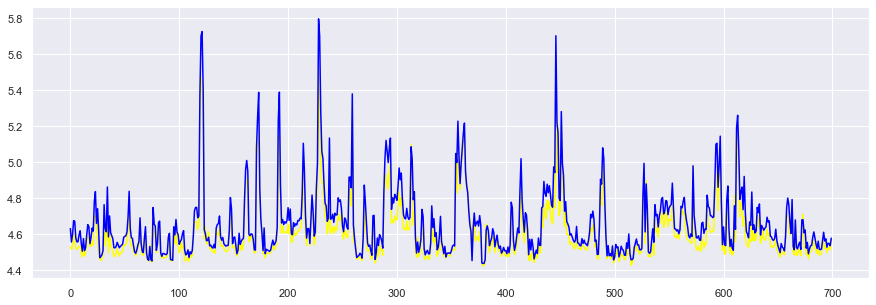

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(sgd.loss_history[2000:]),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history[2000:]),label='Momentum', color = 'blue')

#### Кажется, что модификация не очень хорошо стабилизирует stochastic алгоритм. Колебания ошибки около единицы, это довольно много. Возможно, это связано со значением параметров. Попробуем настроить их в совокупности.

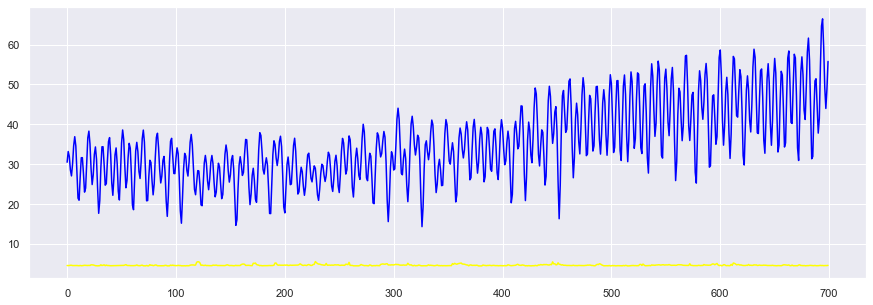

In [43]:
momentum = hand_written_model_get_model('Momentum', eta = 0.02, max_iter = 2700, alpha = 1)

plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(sgd.loss_history[2000:]),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history[2000:]),label='Momentum', color = 'blue')

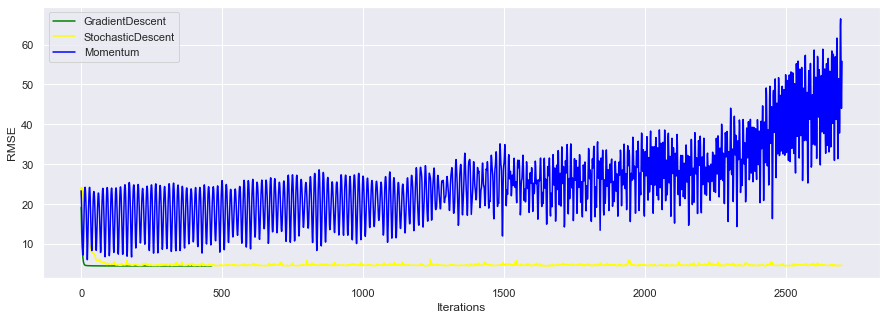

In [44]:
plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(gd.loss_history),label='GradientDescent', color = 'green')
plt.plot(np.sqrt(sgd.loss_history),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history),label='Momentum', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

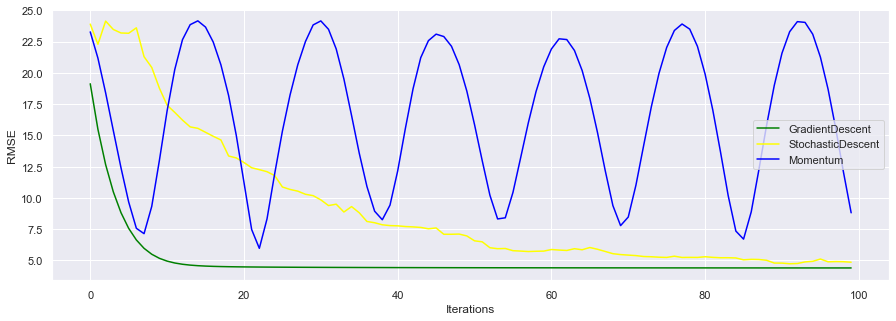

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(gd.loss_history[:100]),label='GradientDescent', color = 'green')
plt.plot(np.sqrt(sgd.loss_history[:100]),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history[:100]),label='Momentum', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Видим, что при alpha = 1 momentum вообще не сходится, попробуем поставить меньше единицы, но достаточно близкое значение

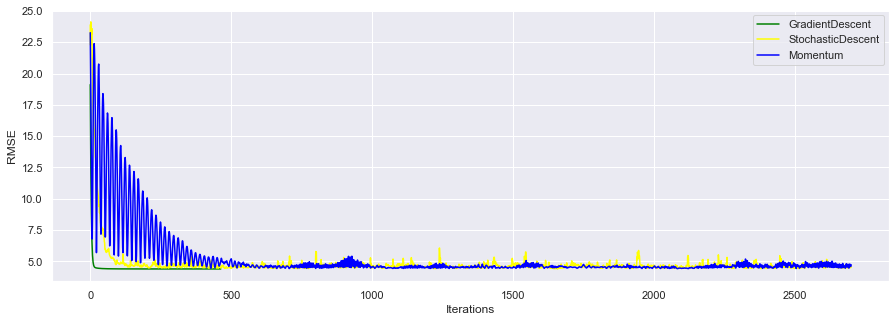

In [46]:
momentum = hand_written_model_get_model('Momentum', eta = 0.02, max_iter = 2700, alpha = 0.99)

plt.figure(figsize=(15, 5))
plt.plot(np.sqrt(gd.loss_history),label='GradientDescent', color = 'green')
plt.plot(np.sqrt(sgd.loss_history),label='StochasticDescent', color = 'yellow')
plt.plot(np.sqrt(momentum.loss_history),label='Momentum', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Получается, параметр alpha позволяет настроить колебания функции потерь от номера итерации. При маленьком значении alpha колебания как у чистого stohastic метода, при увеличении параметра - колебания увеличиваются значительно.
#### Кроме того, параметр delta отвечает за "приближенность" в обычному градиентному спуску. Если delta = 1, то stochastic и есть обычный gradient descent. 